In [1]:
%load_ext autoreload
%autoreload 2
# Add parent directory into system path
import sys, os
sys.path.insert(1, os.path.abspath(os.path.normpath('..')))

In [2]:
import sdf
f = sdf.sphere(1)
points = f.generate(step=0.01, verbose=True, method=1)
sdf.write_binary_stl('sphere_1.stl', points)

min -1.17859, -1.17859, -1.17859
max 1.17859, 1.17859, 1.17859
step 0.01, 0.01, 0.01

376956 triangles in 0.655816 seconds


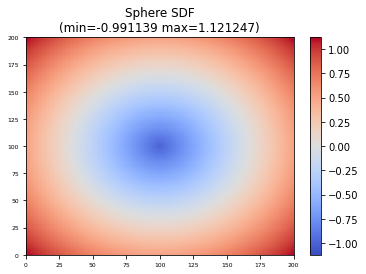

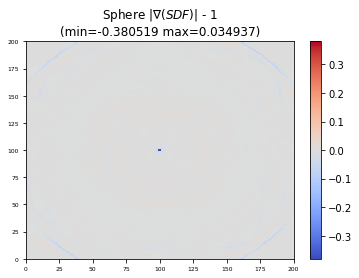

In [6]:
from utils.visualizer import SDFVisualize
visualize = SDFVisualize(z_level=0.0, step=0.05, offset=50, nums=200)
visualize.from_mesh('sphere_1.stl', title='Sphere')